In [1]:
import os
import pandas as pd
import pandas
# ! pip install boto3
# import boto3
from os import listdir
from os.path import isfile, join
import plotly.express as px
import seaborn as sns


In [6]:
path = "data\Quadrant_data\year=2022\month=03"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' data\Quadrant_data\year=2022\month=03 ' :
['day=01', 'day=02', 'day=03', 'day=04', 'day=05', 'day=06', 'day=07', 'day=08', 'day=09', 'day=10', 'day=11', 'day=12', 'day=13', 'day=14', 'day=15', 'day=16', 'day=17', 'day=18', 'day=19', 'day=20', 'day=21', 'day=29', 'day=30', 'day=31']


## Lecture des fichiers 

In [ ]:
from os import listdir
from os.path import isfile, join
path='data/Quadrant_data/year=2022/month=03/'
fichiers = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
dictionnaire={}
for rep in listdir(path):
    onlyfiles = [f for f in listdir(path+rep+'/city=Acumen_MA_Rabat') if isfile(join(path+rep+'/city=Acumen_MA_Rabat', f))]
    dictionnaire[rep]=onlyfiles

## macro table

In [ ]:
dicto_dataframe={}
for day in dictionnaire.keys():
    df=pd.DataFrame()
    for file in listdir("data/Quadrant_data/year=2022/month=03/"+day+"/city=Acumen_MA_Rabat/"):
        df_tmp = pd.read_csv('data/Quadrant_data/year=2022/month=03/'+day+'/city=Acumen_MA_Rabat/'+file, compression='gzip', header=None, sep=',', quotechar='"')
        df=pd.concat([df, df_tmp])

    dicto_dataframe[day]=df
    

In [ ]:
listdir("data/Quadrant_data/year=2022/month=03/day=15/city=Acumen_MA_Rabat/")

In [ ]:
df=pd.DataFrame()
for key in dicto_dataframe.keys():
    df = pd.concat([df,dicto_dataframe[key]])


In [ ]:
df.rename(columns={0:'device_id', 1: 'id_type ', 2:'latitude', 3: 'longitude',  4: 'horizontal_accuracy', 5:'timestamp',6:'ip_address', 7:'device_os', 8:'os_version', 9:'user_agent', 10:'country_code', 11:'source_id ',12:'publisher_id',  13:'app_id',14:'location_context', 15: 'geohash',  16:'consent', 17:'quad_id' }, inplace=True)

df

In [ ]:
# df_tmp= pd.read_csv('data/Quadrant_data/year=2022/month=03/day=15/city=Acumen_MA_Rabat/20220513_034841_00062_ex829_bucket-00000.gz', compression='gzip', header=None, sep=',', quotechar='"')
# df_tmp

In [33]:
df

,device_id,latitude,longitude,datetime,hour,day
0,0eb130f9-dada-4e87-9ab7-8f9bc2c23465,33.978145,-6.822061,2022-03-01 16:22:30,16,1
1,e7859e61-9e61-7533-c6ee-64dfd47b3392,34.020750,-6.822850,2022-03-01 09:02:24,9,1
2,05824422-e943-41be-8d5f-3d4b1f942078,34.020750,-6.822850,2022-03-01 08:43:12,8,1
3,8f9cf4af-f4af-15f4-914c-76c0dc39442f,33.985160,-6.818210,2022-03-01 21:01:02,21,1
4,5d0889ac-94b4-418e-a2eb-f9bf44fde5c6,33.986954,-6.813129,2022-03-01 15:22:47,15,1
...,...,...,...,...,...,...
1998287,6ad809ca-f0ac-4c8f-be93-e0909bb26542,33.998585,-6.818010,2022-03-31 02:00:03,2,31
1998288,6ad809ca-f0ac-4c8f-be93-e0909bb26542,33.998585,-6.818010,2022-03-31 19:16:20,19,31
1998289,6ad809ca-f0ac-4c8f-be93-e0909bb26542,33.998585,-6.818010,2022-03-31 01:38:50,1,31
1998290,63b8e078-b5d0-416d-bbb0-a3cb0307f8af,34.007838,-6.858541,2022-03-31 23:29:13,23,31


In [7]:
df['datetime']=pd.to_datetime(df['timestamp'], unit='ms')

C:\Users\salah\AppData\Local\Temp\ipykernel_92336\2222301729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime']=pd.to_datetime(df['timestamp'], unit='ms')


In [10]:
df=df[['device_id','latitude','longitude','datetime']]

In [11]:
df['hour'] = df.datetime.dt.hour
df['day'] = df.datetime.dt.day

In [19]:
df.to_csv('data\Quadrant_data'+'/macro_table_year2022.csv', index=False)

### traitement sur les données du 7 mars 2022 entre midi et deux

In [2]:
df=pd.read_csv('data\Quadrant_data'+'/macro_table_year2022.csv')

In [4]:
df_7=df.loc[(df['day']==7)]

In [5]:
df_7

,device_id,latitude,longitude,datetime,hour,day
445007,03e8a403-5a94-4f11-9a8e-886eb7ecbeef,33.981822,-6.821696,2022-03-07 17:58:49.000,17,7
445008,5d0889ac-94b4-418e-a2eb-f9bf44fde5c6,33.986960,-6.813120,2022-03-07 05:51:28.000,5,7
445009,5d0889ac-94b4-418e-a2eb-f9bf44fde5c6,33.986954,-6.813129,2022-03-07 16:15:17.000,16,7
445010,5d0889ac-94b4-418e-a2eb-f9bf44fde5c6,33.986950,-6.813110,2022-03-07 20:55:54.000,20,7
445011,5d0889ac-94b4-418e-a2eb-f9bf44fde5c6,33.986954,-6.813129,2022-03-07 16:29:24.000,16,7
...,...,...,...,...,...,...
519408,717c62e8-9c41-4f93-b790-72451dd20342,33.994151,-6.847067,2022-03-07 12:09:58.000,12,7
519409,529476d5-65b2-4554-b6ea-9730a6e35830,34.006165,-6.856289,2022-03-07 06:58:59.000,6,7
519410,1997f464-6528-4dde-aea7-50d40f31af17,34.015631,-6.845406,2022-03-07 14:57:51.000,14,7
519411,b6fec862-1bc4-40c4-9788-b9fcfc062d9e,34.009770,-6.857480,2022-03-07 00:27:26.000,0,7


In [7]:
df_7_entre_midi_et_2=df.loc[(df['day']==7)&(df['hour']<=14)&(df['hour']>=12)]
df_7_entre_midi_et_2

,device_id,latitude,longitude,datetime,hour,day
445013,0eb130f9-dada-4e87-9ab7-8f9bc2c23465,33.978145,-6.822061,2022-03-07 12:00:39.000,12,7
445019,017c1482-b010-457b-8d86-ff6084049b18,33.947994,-6.891099,2022-03-07 14:18:21.000,14,7
445024,abe26bd4-8888-427e-b0b8-27e0bacc9858,33.979169,-6.817454,2022-03-07 14:02:36.000,14,7
445025,48cfccd2-7bbe-4290-98b4-cc7e1c038e58,33.967594,-6.887562,2022-03-07 14:12:09.000,14,7
445028,0be927fd-a6ef-438a-9bca-51de4f13209c,33.968876,-6.821848,2022-03-07 12:47:38.000,12,7
...,...,...,...,...,...,...
519391,64ab49f8-5169-4cf9-82b1-df79e0802970,33.986452,-6.887526,2022-03-07 12:06:24.000,12,7
519401,e5ed6cc1-e001-47d3-87d7-d39e244f4f85,33.989000,-6.817920,2022-03-07 14:45:51.000,14,7
519404,ce9d9d2c-9d2c-fd19-b2bc-98a1a11e12ee,34.003197,-6.818865,2022-03-07 13:07:02.000,13,7
519408,717c62e8-9c41-4f93-b790-72451dd20342,33.994151,-6.847067,2022-03-07 12:09:58.000,12,7


In [8]:
grp_by_device=df_7_entre_midi_et_2.groupby('device_id').datetime.count().sort_values(ascending=False).reset_index()
grp_by_device

,device_id,datetime
0,c6063741-4586-47d7-a47a-7feb7bd712f6,213
1,8ed33cee-e6a2-42cd-8086-0843c353e83a,169
2,6e7c045d-ecd6-46c3-a32c-9c150515362d,123
3,eb6d372a-374f-42ed-9c98-d01c85fd10af,117
4,1e6f459e-7b3f-48cc-a2b1-c3e43dc0c7db,113
...,...,...
1207,1F91F39E-C31B-4BE0-AAEC-847B25E5FDA0,1
1208,8f7fba58-ba58-4f05-9d5d-0890a200140d,1
1209,8f8054ce-54ce-b84b-1cd7-41d6465678b5,1
1210,90621ec3-1ec3-bfde-2f58-f59604263df4,1


In [9]:
grp_by_device.describe()

,datetime
count,1212.000000
mean,10.256601
std,22.048539
min,1.000000
25%,1.000000
50%,2.000000
75%,5.250000
max,213.000000


D:\CARRIER\AkumenIA\datascience-bmci\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='datetime'>

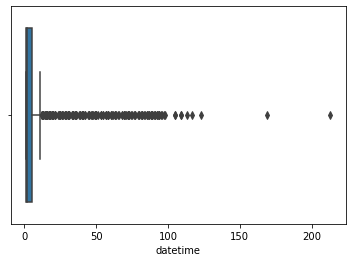

In [30]:
sns.boxplot(grp_by_device.datetime)

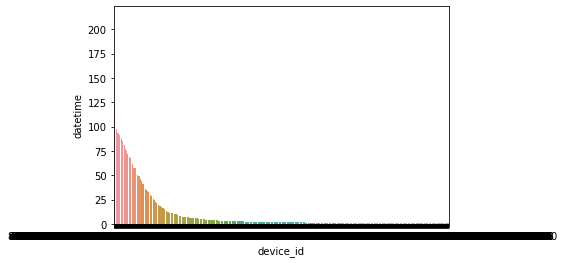

In [10]:
ax = sns.barplot(x="device_id", y="datetime", data=grp_by_device)

In [ ]:
# !pip install plotly

In [12]:
import plotly.express as px
fig = px.scatter_mapbox(df_7_entre_midi_et_2.iloc[:,:], lat="latitude", lon="longitude", 
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

In [13]:
import pandas as pd
import plotly.express as px
fig = px.density_mapbox(df.iloc[1000000:1011120,:], 
                        lat='latitude', lon='longitude' ,radius=6,
                     
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
! pip install dash

In [ ]:
# import plotly.graph_objects as go # or plotly.express as px
# fig = px.density_mapbox(macro_table.iloc[:20], lat='Latitude', lon='Longitude' ,radius=10,
#                      zoom=30,
#                         mapbox_style="stamen-terrain")

# import dash
# from dash import dcc
# from dash import html

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])

# app.run_server(debug=True, use_reloader=True)  # Turn off reloader if inside Jupyter